# 고객 데이터를 활용한 K-means 클러스터링 분석

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [2]:
# 데이터 불러오기
df = pd.read_csv('Mall_Customers.csv')

In [3]:
# Annual Income와 Spending Score 열 선택
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [4]:
# standard scaler로 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# 학습 데이터, 테스트 데이터 분리 (8:2)
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

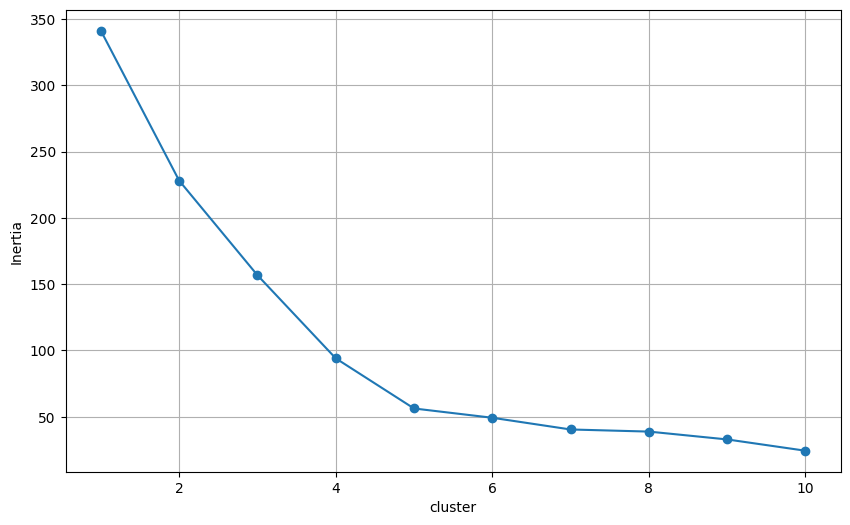

In [9]:
# 엘보우 방법을 사용하여 최적의 클러스터 수 찾기
list_a = [] # 클러스터 수에 따른 inertia 값을 저장할 리스트
range_a = range(1, 11) # 클러스터 수 범위 (1부터 10까지)

# KMeans 클러스터링 수행
for i in range_a:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train)
    list_a.append(kmeans.inertia_) # inertia 값 저장

# inertia 값을 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.plot(range_a, list_a, marker='o')
plt.xlabel('cluster')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [11]:
# 그래프를 보았을 때, 5에서 꺾이므로 최적의 클러스터 수는 5로 판단
optimal_clusters = 5

In [12]:
# 최적의 클러스터 수로 KMeans 클러스터링 수행
kmeans2 = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans2.fit(X_train)

cluster_labels = kmeans2.fit_predict(X_train)

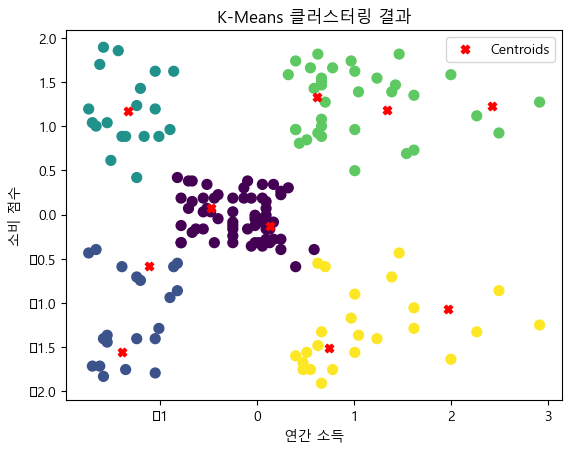

In [ ]:
# 클러스터링 결과 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.scatter(X_train[:, 0], X_train[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
c='red', marker='X', label='Centroids') 
plt.title("K-Means 클러스터링 결과")
plt.xlabel("연간 소득")
plt.ylabel("소비 점수")
plt.legend()
plt.show()

In [ ]:
# 클러스터링 결과에 대한 실루엣 점수 계산
silhouette_avg=silhouette_score(X_train, cluster_labels)

OverallSilhouette Score: 0.55


In [20]:
# 실루엣 값 계산
silhouette_values=silhouette_samples(X_train, cluster_labels)

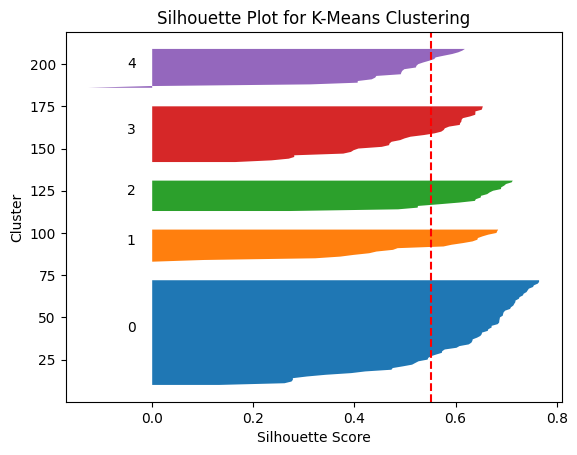

In [ ]:
y_lower=10

for i in range(5): # 각 클러스터에 대해 반복
    ith_cluster_silhouette_values=silhouette_values[cluster_labels==i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i=ith_cluster_silhouette_values.shape[0]
    y_upper=y_lower+size_cluster_i
    
    # 클러스터별 막대 그리기
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values)
    plt.text(-0.05, y_lower+0.5*size_cluster_i, str(i)) # 클러스터 번호
    y_lower=y_upper+10 # 다음 클러스터로 이동

# 실루엣 플롯 시각화
plt.axvline(x=silhouette_avg, color="red", linestyle="--") # 평균 실루엣 점수
plt.title("실루엣 그래프")
plt.xlabel("실루엣 점수")
plt.ylabel("클러스터")
plt.show()

In [ ]:
# 실루엣 점수 출력
print(f"실루엣 점수: {silhouette_avg:.2f}")

실루엣 점수: 0.55
